## Feature engineering, Feature creation and feature storage

- Date normalization


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Alternative to set svg for newer versions
%matplotlib inline


# Showing all the details of results
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# for shap value display feature engineering will be less.

data_all = pd.read_csv('./../Data/data_AutoGluon.csv')

# entry, regular 1...
data_all['entry'] = data_all['entry'].replace({'Regular': 1,'Irregular': 2, 'Foreign Imposition': 3})
data_all['entry']=data_all['entry'].astype(float, errors='raise')

# exit, regular 1...
data_all['exit'] = data_all['exit'].replace({'Regular': 1, 'Irregular': 2, 'Foreign': 3,'Natural Death': 4, 
                                    'Retired Due to Ill Health': 5, 'Suicide': 6, 'Still in Office': 7}) 
                                    
data_all['exit']=data_all['exit'].astype(float, errors='raise')

# exitcode, regular 1...
data_all['exitcode'] = data_all['exitcode'].replace({'Assassination by Unsupported Individual': 1,'Irregular, Other': 2,
                                             'Popular Protest, with Foreign Support': 3, 
                                             'Popular Protest, without Foreign Support': 4,
                                             'Regular': 5, 'Removed by Military, with Foreign Support': 6,
                                             'Removed by Military, without Foreign Support': 7, 
                                             'Removed by Other Government Actors, with Foreign Support': 8,
                                             'Removed by Other Government Actors, without Foreign Support': 9,
                                             'Removed by Rebels, with Foreign Support': 10,
                                             'Removed by Rebels, without Foreign Support': 11,
                                             'Removed in Military Power Struggle Short of Coup': 12,
                                             'Removed through Threat of Foreign Force': 13, 'Unknown': 14,
                                             'Still in Office': 15}) 
data_all['exitcode']=data_all['exitcode'].astype(float, errors='raise')

# posttenurefate
data_all['posttenurefate'] = data_all['posttenurefate'].replace({'Death': 1, 'Exile': 2, 'Imprisonment': 3, 
                                     'Missing: Natural Death within Six Months of Losing Office': 4, 
                                     'Missing: No Information Found': 5, 'OK': 6, 'Suicide': 7, 
                                     'Leader Still in Office': 8, 'Missing: Left Office after*': 9}, regex=True) 
data_all['posttenurefate']=data_all['posttenurefate'].astype(float, errors='raise')

data_all.dropna(subset = ['growth_rate'], inplace=True)

# delete unused data
del data_all['end_gdppc']
del data_all['country']
del data_all['yrdied']
del data_all['yrend']
del data_all['fties_range']

data_all.shape

(1445, 18)

In [3]:
# Save dataset to CSV file
data_all.to_csv(r'./../Data/data_AutoGluon_final.csv', index = False)

C:\Users\DELL\AppData\Local\Temp\ipykernel_12464\3837925768.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr= data_all.corr()


([<matplotlib.axis.XTick at 0x1e20d89a4f0>,
 [Text(0, 1, 'ccode'),
  Text(1, 1, 'entry'),
  Text(2, 1, 'exit'),
  Text(3, 1, 'exitcode'),
  Text(4, 1, 'prevtimesinoffice'),
  Text(5, 1, 'posttenurefate'),
  Text(6, 1, 'gender'),
  Text(7, 1, 'yrborn'),
  Text(8, 1, 'numentry'),
  Text(9, 1, 'numexit'),
  Text(10, 1, 'yrbegin'),
  Text(11, 1, 'pop_x'),
  Text(12, 1, 'begin_gdppc'),
  Text(13, 1, 'pop_y'),
  Text(14, 1, 'age'),
  Text(15, 1, 'tenure'),
  Text(16, 1, 'growth_rate'),
  Text(17, 1, 'fties_range'),
  Text(18, 1, 'growth_rate_normgroup'),
  Text(19, 1, 'growth_rate_avggrp')])

([<matplotlib.axis.YTick at 0x1e20fb73ee0>,
 [Text(0, 0, 'ccode'),
  Text(0, 1, 'entry'),
  Text(0, 2, 'exit'),
  Text(0, 3, 'exitcode'),
  Text(0, 4, 'prevtimesinoffice'),
  Text(0, 5, 'posttenurefate'),
  Text(0, 6, 'gender'),
  Text(0, 7, 'yrborn'),
  Text(0, 8, 'numentry'),
  Text(0, 9, 'numexit'),
  Text(0, 10, 'yrbegin'),
  Text(0, 11, 'pop_x'),
  Text(0, 12, 'begin_gdppc'),
  Text(0, 13, 'pop_y'),
  Text(0, 14, 'age'),
  Text(0, 15, 'tenure'),
  Text(0, 16, 'growth_rate'),
  Text(0, 17, 'fties_range'),
  Text(0, 18, 'growth_rate_normgroup'),
  Text(0, 19, 'growth_rate_avggrp')])

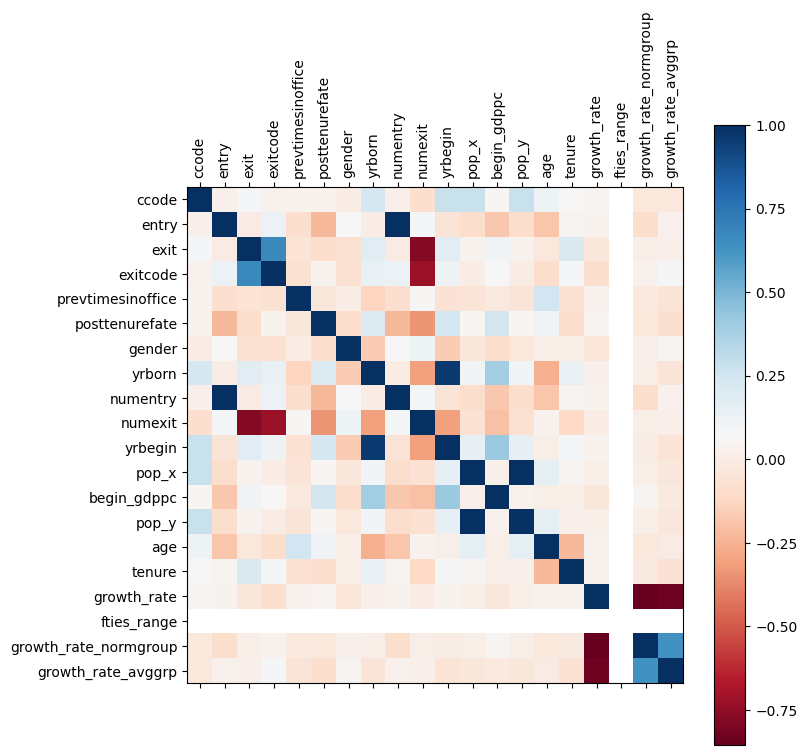

In [10]:
# Fig.2 of the correlations plot
# The correlations of all the variables used in this study sample: leaders' age, leaders' tenure
corr= data_all.corr()

# Visualize the corelation between each column
fig = plt.figure(figsize =(8,8))
corr_plot = plt.matshow(corr, cmap='RdBu', fignum = fig.number)
fig.colorbar(corr_plot)
plt.xticks(range(len(corr.columns)), corr.columns, rotation = 'vertical')
plt.yticks(range(len(corr.columns)), corr.columns)